<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Andrés Camacho López </h2> 

---
## Profesor:
## Sergio A. Alcalá Corona
## Ayudantes:
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h1 align="center">Programación para la física computacional</h1> 

## Práctica 5.  Programación para la física computacional


###

---

### EJERCICIOS:


**1. Regla del Trapecio.**

El archivo velocidades.txt (adjunto), contiene dos columnas de numeros, la primera representa el tiempo t en segundos y la segunda la x-velocidad en metros por segundo de una partıcula, medida una vez por segundo desde el tiempo t = 0 hasta t = 100.

Escribe un programa para hacer lo siguiente:

(a) Lee los datos y, usando la regla del trapecio, calcula a partir de ellos la distancia
aproximada recorrida por la part ́ıcula en la direccion x como una funcion del tiempo.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
a = 0
b = 100
n = 100
h = (b-a)/n #calculo de h lo hacemos asi pues integramos del tiempo 0 en 100 intervalos
tiempo = []
velocidad = []
ent = open("velocidades.txt", "r") #abrimos el arcivho y lo separamos en dos listas para tiempo y velocidad
for line in ent:
    datos = line.split()
    tiempo.append(float(datos[0]))
    velocidad.append(float(datos[1]))

distancia = np.zeros_like(tiempo)#crear un arreglo de ceros donde podamos guardar los datos de la distancia
for i in range(0,len(tiempo)):
    distancia[i]= distancia[i-1]+h*(velocidad[i]+velocidad[i-1])/2
    #ya no es necesario hacer la velocidad en funcion del tiempo explicatamente pues como el tiempo va en tiempos enteros de 0 a 100
    # podemos usar un rango de 0 a len(tiempo). Esta funcion esta diseñada para integrar con la regla del trapecio en cada intevalo de tiempo

print(distancia)

[ 0.168654   0.203393   0.306979   0.477992   0.7146995  1.015069
  1.3767825  1.7972515  2.273634   2.8028505  3.381603   4.006394
  4.673546   5.3792225  6.1194485  6.890132   7.687086   8.5060505
  9.342713  10.192731  11.0517545 11.9154465 12.779505  13.639683
 14.4918085 15.331805  16.155709  16.9596885 17.74006   18.493305
 19.216085  19.9052545 20.557875  21.1712265 21.742818  22.2703965
 22.7519545 23.185737  23.5702475 23.904251  24.186776  24.4171175
 24.594836  24.7197555 24.7919625 24.811801  24.779867  24.697003
 24.56429   24.3830395 24.1547845 23.8812685 23.564434  23.20641
 22.8094995 22.3761665 21.909021  21.410804  20.8843735 20.3326875
 19.758789  19.16579   18.5568545 17.9351835 17.303998  16.666523
 16.0259715 15.385529  14.748338  14.117484  13.4959805 12.886755
 12.292636  11.71634   11.1604605 10.627456  10.1196405  9.639174
  9.188053   8.7681035  8.380974   8.0281305  7.7108515  7.430224
  7.18714    6.9822955  6.81619    6.689126   6.6012105  6.552356
  6.542

(b) Extiende tu programa para hacer una grafica que muestre, en el mismo grafico, tanto la curva de velocidad original como la distancia recorrida como una funcion del tiempo.

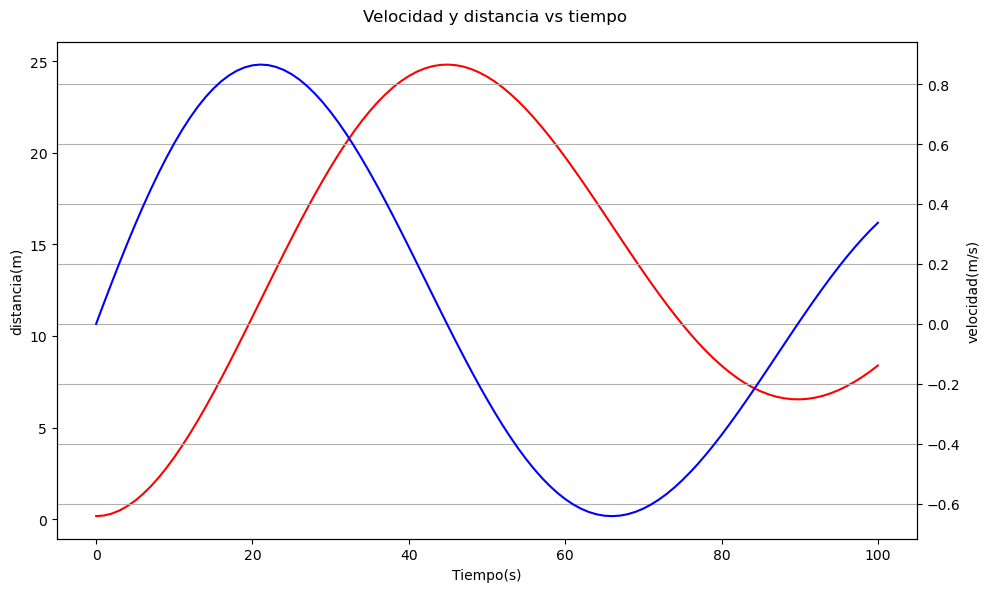

In [16]:
import matplotlib.pyplot as plt
import numpy as np
a = 0
b = 100
n = 100
h = (b-a)/n #calculo de h lo hacemos asi pues integramos del tiempo 0 en 100 intervalos
tiempo = []
velocidad = []
ent = open("velocidades.txt", "r") #abrimos el arcivho y lo separamos en dos listas para tiempo y velocidad
for line in ent:
    datos = line.split()
    tiempo.append(float(datos[0]))
    velocidad.append(float(datos[1]))

distancia = np.zeros_like(tiempo)
for i in range(0,len(tiempo)):
    distancia[i]= distancia[i-1]+h*(velocidad[i]+velocidad[i-1])/2
    #ya no es necesario hacer la velocidad en funcion del tiempo explicatamente pues como el tiempo va en tiempos enteros de 0 a 100
    # podemos usar un rango de 0 a len(tiempo). Esta funcion esta diseñada para integrar con la regla del trapecio en cada intevalo de tiempo

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel("Tiempo(s)")
ax1.set_ylabel("distancia(m)")
ax1.plot(tiempo, distancia, color="r", label="Distancia")

ax2 = ax1.twinx()
ax2.set_ylabel("velocidad(m/s)")
ax2.plot(tiempo, velocidad, color="b", label="Velocidad")

fig.suptitle("Velocidad y distancia vs tiempo")
plt.tight_layout()
plt.grid()
plt.show()

**2. Integración numérica.**
 
(a) Escribe un programa para calcular un valor aproximado para la integral

\begin{equation}
\int^2 _0(x^4 − 2x + 1) dx,
\end{equation}
utilizando tanto la regla del trapecio, como la regla de Simpson con 10 divisiones.

In [58]:
import numpy as np #regla del trapecio 

def f(x):
    return(x**4 -(2*x)+1) #funcion definida
def trapecio(a, b, n):
    h = (b-a)/n 
    integ = (h/2)*(f(a)+f(b)) #parte que no necesita iterarciones para sumar
    for i in range(1,n):
        integ = integ + h*f(a+i*h) #parte que hace la suma y completa la regla del trapecio
    return(integ)
a = 0
b = 2
n = 10 #datos para h usando los limites de integración con las divisones pedidas
print(trapecio(a, b, n))

4.506560000000001


In [59]:
import numpy as np #fórmula de simpson formula 2
def f(x):
    return((x**4)-(2*x)+1) #funcion a usar
def integ(a,b,n):
    h = (b-a)/n
    inte = (f(a)+f(b)) #parte que no necesita iterar
    int1 = 0 # definiendo variables cero para hacer la suma
    int2 = 0
    for k in np.arange(1, (n/2)+1):
      int1 = int1 + (4*(f(a+((2*k)-1)*h))) # suma de la primera parte de la integral
    for k in np.arange(1, n/2):
        int2 = int2 + (2*(f(a + (2*k*h)))) #suma de la segunda parte de la integral
    intf = (h/3)*(inte + int1 + int2) # suma de los resultados para obtener la integral
    return(intf)
a = 0
b = 2
n = 10
print(integ(a,b,n))

4.400426666666667


(b) Ejecuta el programa y compara tu resultado con el valor correcto conocido de 4.4.

¿Cual es el error en tu calculo?

In [62]:
import math as mt
#usamos la norma del error |4.4-4.40132654...|
E1 = trapecio(a, b, n) - 4.4
E2 = integ(a,b,n) -4.4

print("El error con la regla de trapecio es", E1)
print("El error con la regla de simpson es", E2)

El error con la regla de trapecio es 0.10656000000000088
El error con la regla de simpson es 0.0004266666666667973


(c) Modifica el programa para utilizar 100 divisiones y luego 1000. ¿Como mejora el resultado?. ¿Como se comparan los resultados entre ambas reglas al usar la misma cantidad de divisiones?

In [63]:
import numpy as np #regla del trapecio 

def f(x):
    return(x**4 -(2*x)+1)
def trapecio(a, b, n):
    h = (b-a)/n
    integ = (h/2)*(f(a)+f(b))
    for i in range(1,n):
        integ = integ + h*f(a+i*h)
    return(integ)
a = 0
b = 2
n = 100
print(trapecio(a, b, n))

4.401066655999999


In [64]:
import numpy as np #fórmula de simpson formula 2
def f(x):
    return((x**4)-(2*x)+1)
def integ(a,b,n):
    h = (b-a)/n
    inte = (f(a)+f(b))
    int1 = 0 
    int2 = 0
    for k in np.arange(1, (n/2)+1):
      int1 = int1 + (4*(f(a+((2*k)-1)*h)))
    for k in np.arange(1, n/2):
        int2 = int2 + (2*(f(a + (2*k*h))))
    intf = (h/3)*(inte + int1 + int2)
    return(intf)
a = 0
b = 2
n = 100
print(integ(a,b,n))

4.400000042666668


Notamos que el error y es menor cuando usamos mas divisiones para obtener los resultados de la integral, además que podemos ver que usando la regla del trapecio el resultado es menos preciso

**3. El l ́ımite de difracci ́on de un telescopio.:**

a) Escribe una funcion J(m,x) que calcule el valor de $J_m(x)$ usando la regla de Simpson con N = 1000 puntos. Utiliza dicha funcion en un programa para graficar, en un solo grafico, las funciones de Bessel $J_0$, $J_1$ y $J_2$ como una funcion de x (de x = 0 a x = 20).

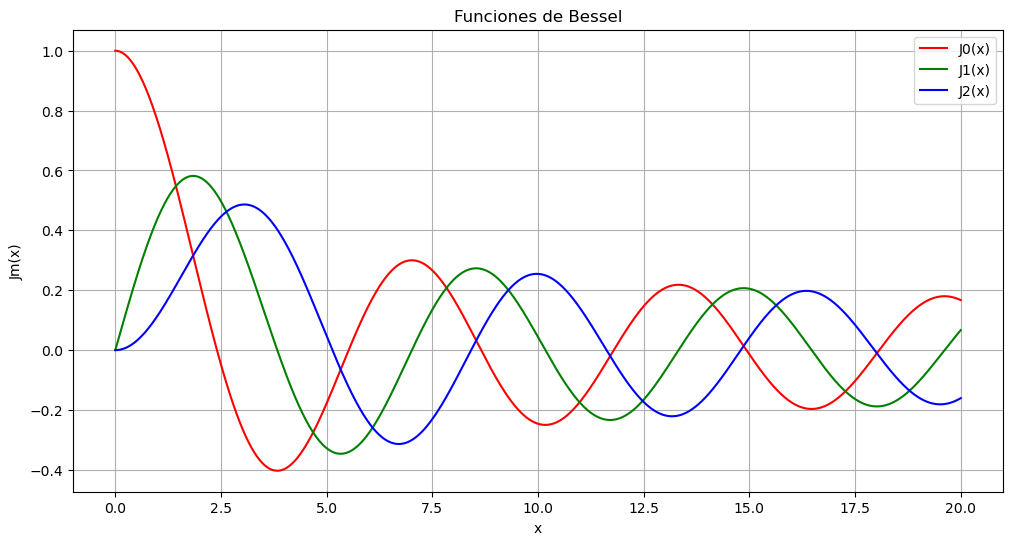

In [48]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000
a = 0
b = np.pi
theta = np.linspace(a,b,N+1) #definimos las particiones que usa theta y el espacio donde trabaja
h = (b-a)/N
def Jm(m,x):
    f = np.cos(m*theta-x*np.sin(theta)) #definimos nuestra función 
    inte1 = f[0]+f[N] #primera parte de simpson
    inte2 = 0 
    inte3 = 0
    for i in range(1,N,2):
        inte2 = inte2 + 4*f[i] #hacemos nuestra segunda parte de simpson
    for i in range(2,N-1,2):
        inte3  = inte3 +2*f[i] #tercera parte de simpson
    integral = (inte1 + inte2 + inte3)*(h/3) #integral de simpson completa
    Jm = (1/np.pi)*integral #integral para bessel
    return Jm

r = np.linspace(0,20,N) #definimos un rango con el numero de intervalos pedidos y el numero de divisiones
J0 = [Jm(0,x) for x in r]
J1 = [Jm(1,x) for x in r]
J2 = [Jm(2,x) for x in r]

plt.figure(figsize=(12,6))
plt.plot(r, J0, "r", label="J0(x)")
plt.plot(r, J1, "g", label="J1(x)")
plt.plot(r, J2, "b", label="J2(x)")
plt.xlabel("x")
plt.ylabel("Jm(x)")
plt.title("Funciones de Bessel")
plt.legend()
plt.grid()
plt.show()

(b) Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla de Simpson.

/tmp/ipykernel_3211/3468912642.py:10: DeprecationWarning: You are passing x=[0.         0.00314159 0.00628319 ... 3.13530947 3.13845106 3.14159265] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integ = simpson(c,theta)


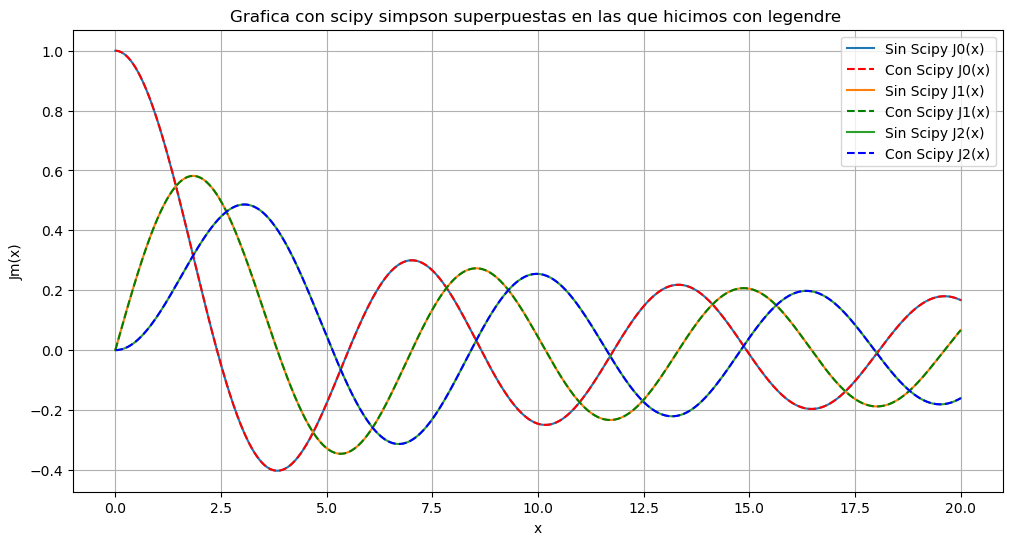

In [84]:
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import numpy as np
N=1000
a = 0
b = np.pi
theta = np.linspace(a,b,N+1)
r = np.linspace(0,20, N)
def Jscipy(m,x):
    f = np.cos(m*theta - x*np.sin(theta))
    integ = simpson(f,theta)
    Jm = (1/np.pi)*integ
    return Jm

J01 = [Jm_scipy(0, x) for x in r]
J11 = [Jm_scipy(1, x) for x in r]
J21 = [Jm_scipy(2, x) for x in r]

plt.figure(figsize=(12,6))
plt.plot(r, J0, label="Sin Scipy J0(x)")
plt.plot(r, J01, "r--", label="Con Scipy J0(x)")
plt.plot(r, J1, label="Sin Scipy J1(x)")
plt.plot(r, J11,"g--", label="Con Scipy J1(x)")
plt.plot(r, J2, label="Sin Scipy J2(x)")
plt.plot(r, J21,"b--", label="Con Scipy J2(x)")
plt.xlabel("x")
plt.ylabel("Jm(x)")
plt.title("Grafica con scipy simpson superpuestas en las que hicimos con legendre ")
plt.legend()
plt.grid()
plt.show()


(c) Escribe un segundo programa que haga una grafica de densidad (density plot) de la intensidad del patron de difraccion circular de una fuente de luz puntual con λ = 500 nm, en una region cuadrada del plano focal, usando la formula dada anteriormente. Su imagen debe cubrir valores de r desde cero hasta aproximadamente 1 μm.

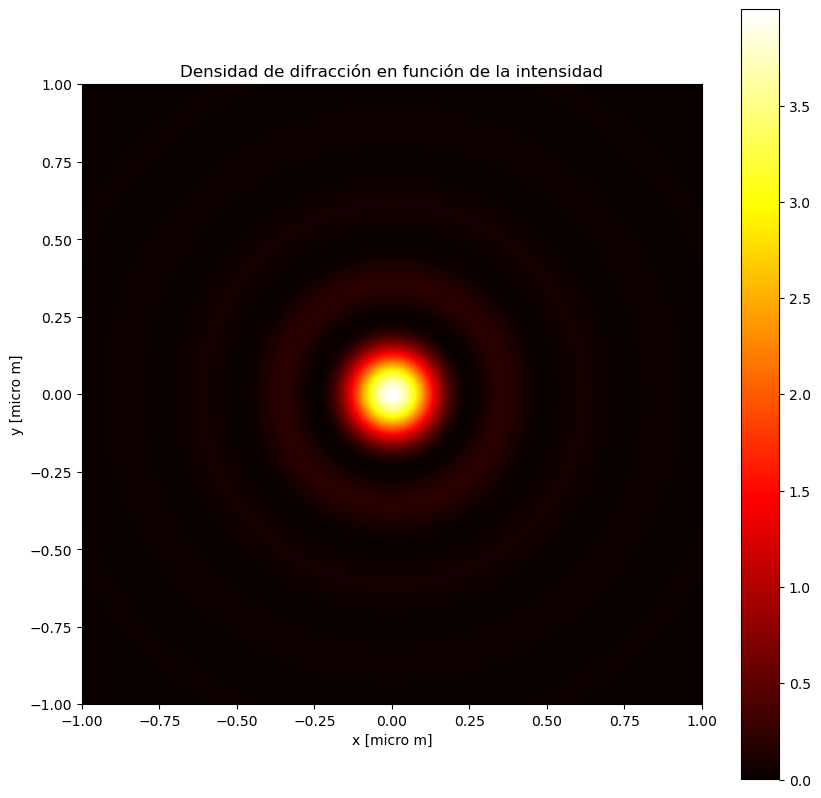

In [83]:
l = 500e-9 #definimos la lambda
k = (2*np.pi)/l #usamos la k dada
rango = 1e-6 #definimos el rango para le maximo y el minimo 
N = 550
x = np.linspace(-rango, rango, N) #definimos los rangos y sus particiones en en las variables x, y
y = np.linspace(-rango, rango, N)
X,Y = np.meshgrid(x,y) #creamos el arreglo para las dimesiones en las variables
r = np.sqrt((X**2 + Y**2)) # radio
def I(radio):
    arg = k*r #el argumento de la funcions
    with np.errstate(divide="ignore", invalid="ignore"): #funcion para excluir valores como da el hint del ejercicio
         i=(2*np.where(arg==0,(1/2), np.divide(np.sin(arg), arg)))**2
    return(i)
    
i = I(r) #intensidad

plt.figure(figsize=(10,10))
plt.imshow(i, extent=(-rango*1e6, rango*1e6, -rango*1e6, rango*1e6), cmap='hot') 
plt.colorbar()
plt.xlabel("x [micro m]")
plt.ylabel("y [micro m]")
plt.title("Densidad de difracción en función de la intensidad")
plt.show()

**4. Capacidad calorıfica de un sólido**
 
(a) Escribe una funcion $C_v(T)$ que calcule la $C_V$ para un valor dado de temperatura, de una muestra que consta de 1000 centımetros cubicos de aluminio solido, con densidad numerica de  $ρ = 6.022 × 10^{28} m^{−3}$ y una temperatura de Debye de $θ_D = 428 K$. Utiliza la cuadratura gaussiana para evaluar la integral, con N = 50 puntos muestra.

In [80]:
from scipy.special import roots_legendre

volumen = 1000*1e-6 #volumen en metros
rho = 6.022e28 
kB = 1.380649e-23 #c de Boltzman
thetaD = 428 #temp de Debye
N = 50
a = 0
puntos, masas = roots_legendre(N) 
def Cv(T):
    b = thetaD/T
    ptransf = (0.5*(b-a)*puntos +0.5*(b+a)) #puntos y masas transformados a los limites definidos por mi integral en el ejercicio
    mtransf = 0.5*(b-a)*masas
    integ = 0
    for i in range(N):
        integ = integ + mtransf[i]*((ptransf[i]**4 *np.exp(ptransf[i]))/(np.exp(ptransf[i])-1)**2)
        #interal hecha con cuadratura Gaussina
    Cv = 9*volumen*rho*kB*((T/thetaD)**3)*integ #otencion de Cv usando el resultado de la integral
    return(Cv)

print("La capacidad calorífica es", Cv(300), "J/K")

La capacidad calorífica es 2257.7973049455863 J/K


(b) Usa tu funcion para hacer una grafica de la capacidad calorıfica en funcion de la temperatura desde T = 5 K hasta T = 500 K.

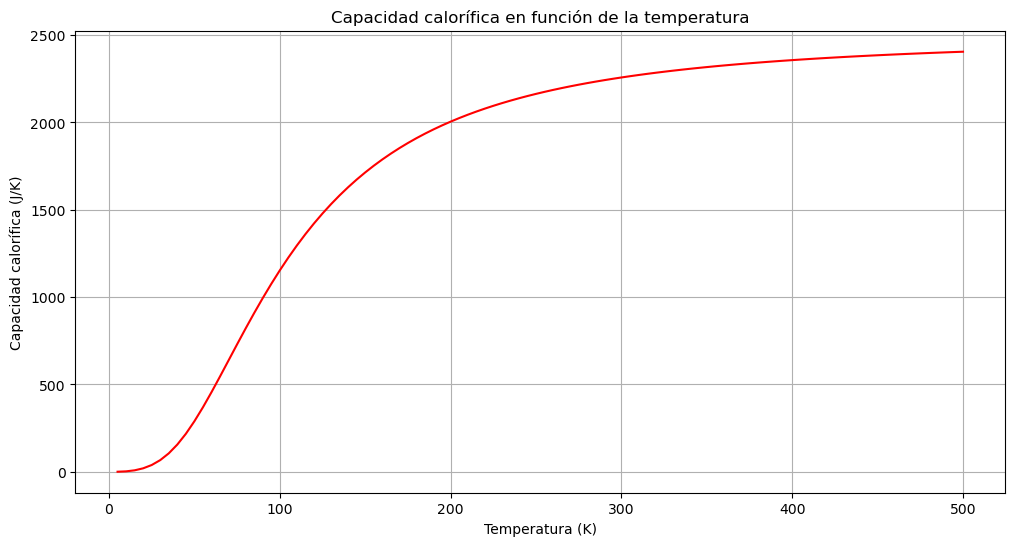

In [81]:
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

volumen = 1000*1e-6 
rho = 6.022e28 
kB = 1.380649e-23 
thetaD = 428 
puntos, masas = roots_legendre(N) 
N = 50
a = 0
def Cv(T):
    b = thetaD/T
    ptransf =(0.5*(b-a)*puntos +0.5*(b+a)) #puntos y masas transformados para cambiar los límites
    mtransf = 0.5*(b-a)*masas
    integ = 0
    for i in range(N):
        integ = integ+ mtransf[i]*((ptransf[i]**4 *np.exp(ptransf[i]))/(np.exp(ptransf[i])-1)**2) #defeinimos integral por Gaussiana
    Cv = 9*volumen*rho*kB*((T/thetaD)**3)*integ #obtenemos Cv con los resultados anteriores
    return Cv
tem = np.linspace(5,500,100) #definimos rango de temperaturas con sus divisiones
cv = [Cv(T) for T in tem]

plt.figure(figsize=(12,6))
plt.plot(tem,cv,"r")
plt.xlabel("Temperatura (K)")
plt.ylabel("Capacidad calorífica (J/K)")
plt.title("Capacidad calorífica en función de la temperatura")
plt.grid()
plt.show()

**5. Atraccion gravitacional de una lamina uniforme**

Inciso a)

Sabemos que la densidad superficial de la lámina es $\sigma = \frac{M}{L^2} = \frac{10000 kg}{100 m^2} = 100 \frac{kg}{m^2}$

Como queremos encontrar la fuerza gravitacional a una distacncia z perpendicular a la lámina primero usaremos la difrenecial de fuerza, es decir en una sección pequeña de la lámina: 

\begin{equation}
dF = - G \frac{dm}{r^2} \hat{r}
\end{equation}

pues debemos usar al diferencial de masa para la lámina sería $dm = \sigma dx dy$ y además r es la distancias a cualqier punto desde la placa $r = \sqrt(x^2 + y^2 + z^2)$ 

para la diferencial de la fuerza en z tenemos que 

\begin{equation}
dF_z = dF \cdot \hat{z} = - G \frac{\sigma dx dy}{(x^2 + y^2 + z^2)^\frac{3}{2}} z
\end{equation}

por lo que integrando en dx y dy podemos obtener la expresión para la fuerza (los limites serán de -L/2 a L/2 el punto de referencia es el centro)

\begin{equation}
F_z = -G \sigma z \int \int_{L/2} ^{L/2}  \frac{dx dy}{(x^2 + y^2 + z^2)^\frac{3}{2}} 
\end{equation}

Inciso b

La fuerza desde z=0 hasta z=10 es: 4.286904155107934e-08


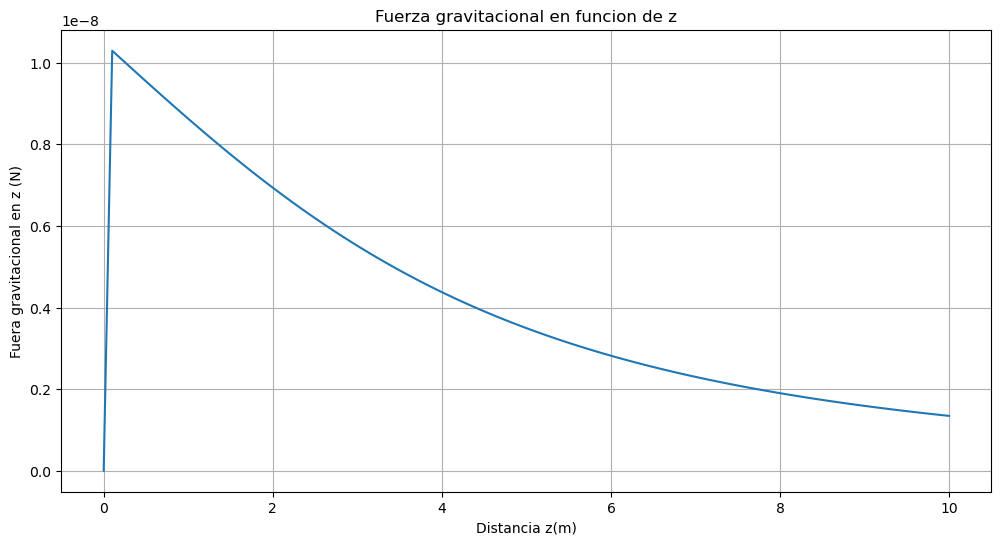

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

G = 6.674E-11
L = 10
M = 10000 # 10 toneladas
sigma = M/L**2
N = 100
def Fg(z, N):
    punt, masa = roots_legendre(N)
    punt = L/2 * (punt+1)/2
    masa = L/2 * masa/2
    fz = 0
    for i in range(N):#primera suma
        for j in range(N): #segunda suma
            x = punt[i]
            y = punt[j]
            r2 = x**2 + y**2 + z**2
            fz = fz + masa[i]*masa[j]/r2**(3/2) #forma en la que esta hecha la suma para la integral 
    Fz = fz * G *sigma * z #integración de todas las partes
    return(Fz, fz)

zs = np.linspace(0,10,N) #espacio en el que está la distancia de z y sus particiones
fs = []#aqui vamos a guardar la integral en todas las distancias es decir la fuerza en cada intervalo
integs = []#aqui vamos a guardar la suma hechas para todas las las integrales es decir las distancias
for z in zs:
    Fz, fz = Fg(z, N)
    fs.append(Fz)
    integs.append(fz)
 
print("La fuerza desde z=0 hasta z=10 es:", sum(fs)*(zs[1]-zs[0])) #usamos la integral en cada itervalo de z y las sumamos
#multiplicamos por zs[1]-zs[0] pues es el tamaño de cada intervalo, en realidad funciona para zs[i]-zs[i-1]

plt.figure(figsize=(12,6))
plt.plot(zs, fs)
plt.xlabel("Distancia z(m)")
plt.ylabel("Fuera gravitacional en z (N)")
plt.title("Fuerza gravitacional en funcion de z")
plt.grid()
plt.show()

Inciso c)

Este artefacto proviene de la forma en la que calculamos nuestra integral usando un método numérico, pues cuando z es muy pequeño, entonces la distancia ($r = \sqrt(x^2 + y ^2 + z ^2$) de la lámina a cualqier punto en el eje z tambien es muy pequeño, por lo que al integrar la funcion se tendrá un pico cerca del origen por lo que si nuestro numero de muestras no es muy grande, entonces no se va tomar en cuenta de la forma adecuada en ese sitio, ademas si vemos la expresión para la fuerza, podemos ver que el denominador $(\sqrt(x^2 + y ^2 + z ^2)^{3/2}$ se hará grande si z es pequeño, lo que puede generar errores numéricos.

Una forma de corregir este error sería aumentando el numero de muestras para integrar de forma que el pico pueda considerarse de mejor manera en la integración, o tambien podemos integrar con una muestra grande un intervalo cercano y en ese punto para agregarlo al resultado del resto de la función donde tenemos un comportamiento más regular.